**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
import graphviz
from subprocess import call
from sklearn.preprocessing import LabelEncoder

**Upload the dataset**

In [3]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


**Load the dataset**

In [4]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

**Basic information about the dataset**

In [5]:
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nClass Distribution:")
print(df['target'].value_counts())


First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4 

**Check for missing values and plot target variable**


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


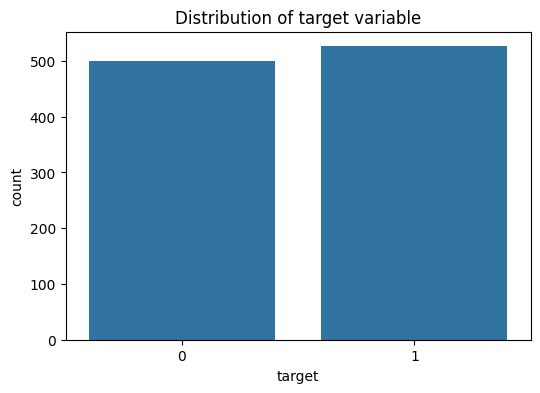

In [6]:
# Check missing values
print("\nMissing values:")
print(df.isnull().sum())

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of target variable')
plt.show()

**Split dataset**

In [10]:
# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (717, 13)
Testing set size: (308, 13)


**Train decision tree**

In [13]:
print("\n Decision Tree Classifier\n ")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification report:")
print(classification_report(y_test, y_pred_dt))


 Decision Tree Classifier
 
Accuracy: 0.9707792207792207

Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



**Confusion matrix for decision tree**

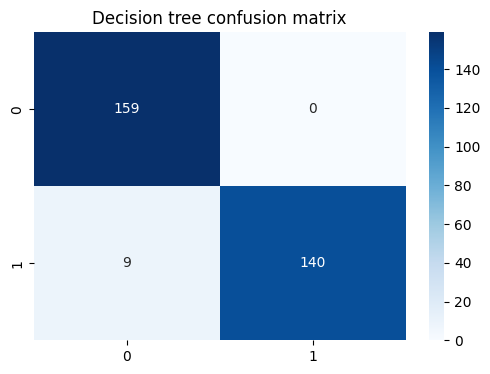

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision tree confusion matrix')
plt.show()

**Visualize the decision tree**

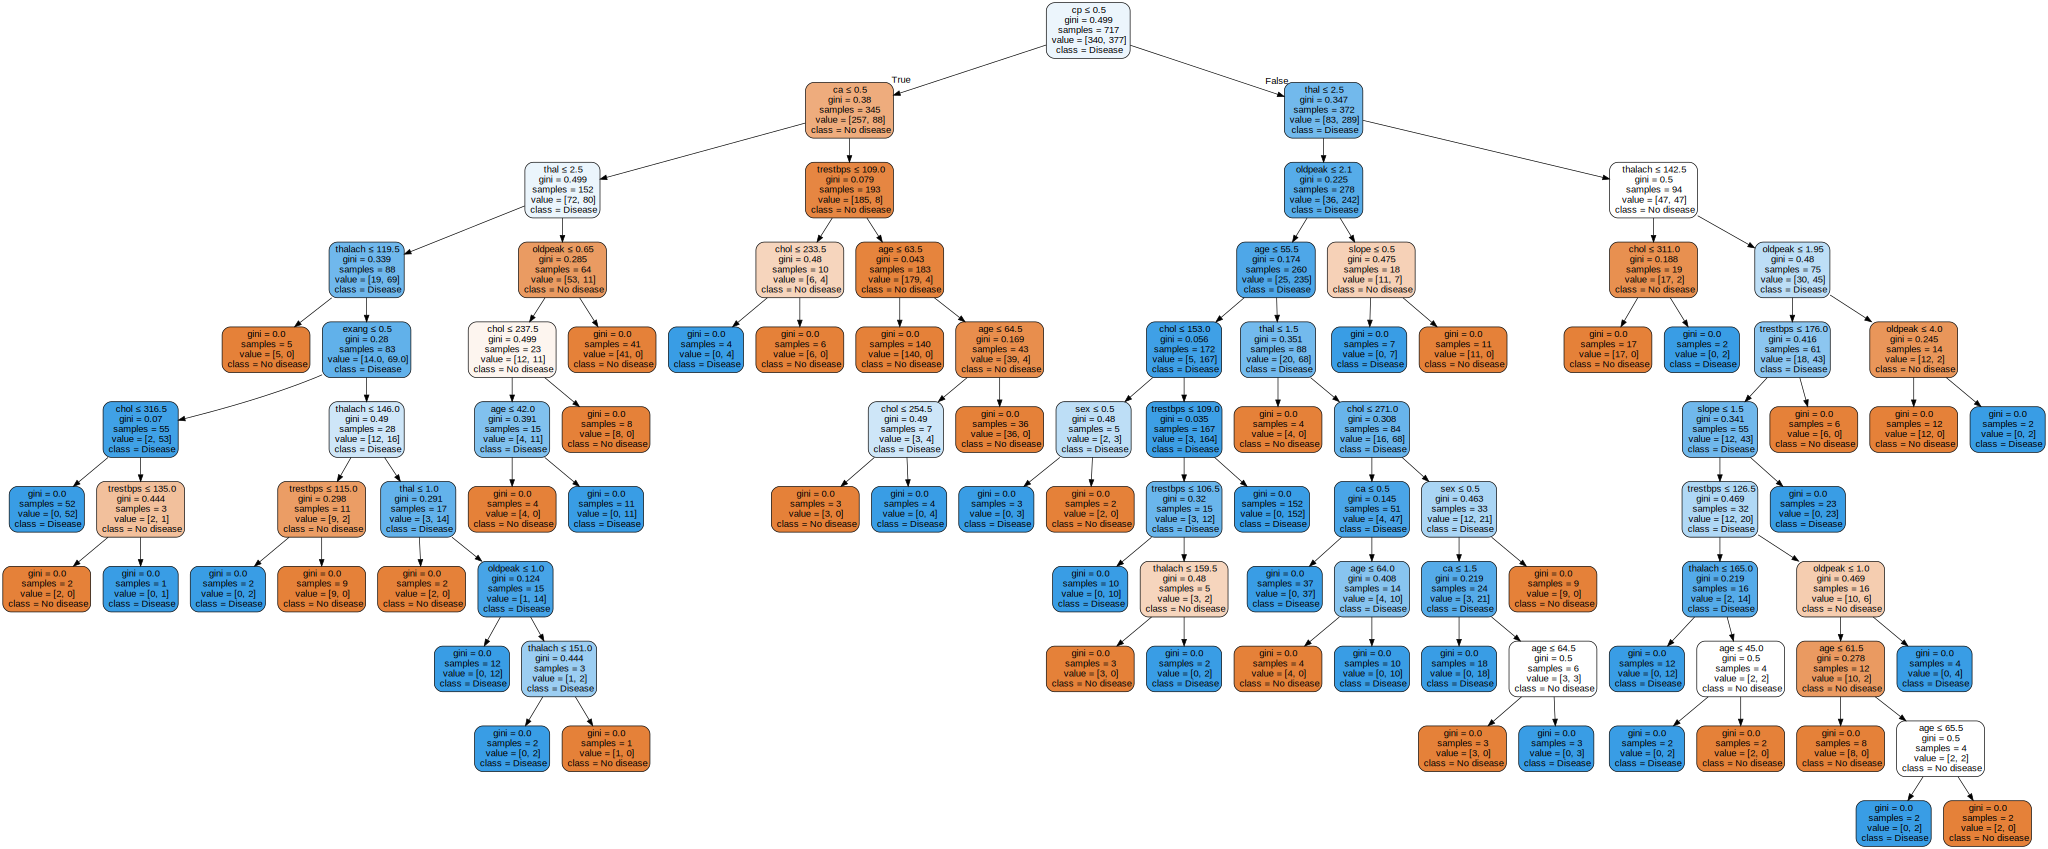

In [15]:
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns,
                           class_names=['No disease', 'Disease'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("heart_disease_tree")
graph

**Control tree depth**


Controlling Tree Depth 


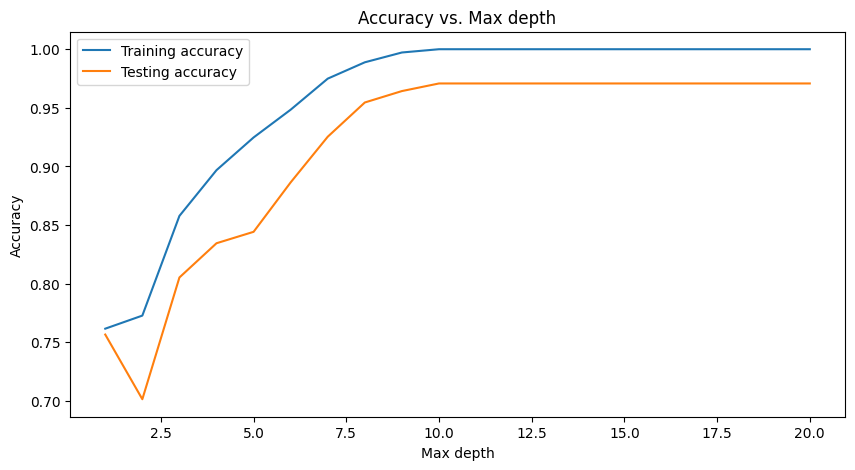

Optimal tree depth: 10


In [17]:
print("\nControlling Tree Depth ")
max_depths = range(1, 21)
train_acc = []
test_acc = []
for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, dt.predict(X_train)))
    test_acc.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_acc, label='Training accuracy')
plt.plot(max_depths, test_acc, label='Testing accuracy')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max depth')
plt.legend()
plt.show()

optimal_depth = max_depths[np.argmax(test_acc)]
print(f"Optimal tree depth: {optimal_depth}")

**Optimal decision tree**

In [20]:
dt_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dt_optimal.fit(X_train, y_train)
y_pred_optimal = dt_optimal.predict(X_test)
print("\nOptimal decision tree performance:")
print("\nAccuracy:", accuracy_score(y_test, y_pred_optimal))
print("\nClassification report:")
print(classification_report(y_test, y_pred_optimal))


Optimal decision tree performance:

Accuracy: 0.9707792207792207

Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



**Train random forest**


Random Forest Classifier

Accuracy: 0.9805194805194806

Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



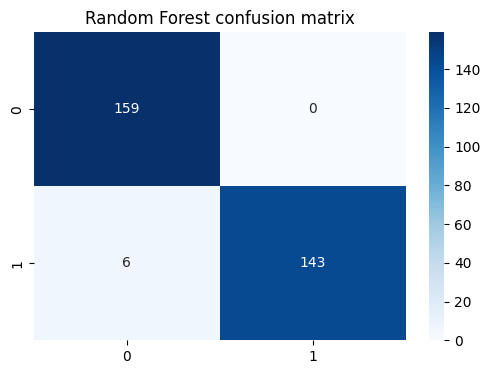

In [21]:
print("\nRandom Forest Classifier")

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest confusion matrix')
plt.show()

**Feature importance plot**

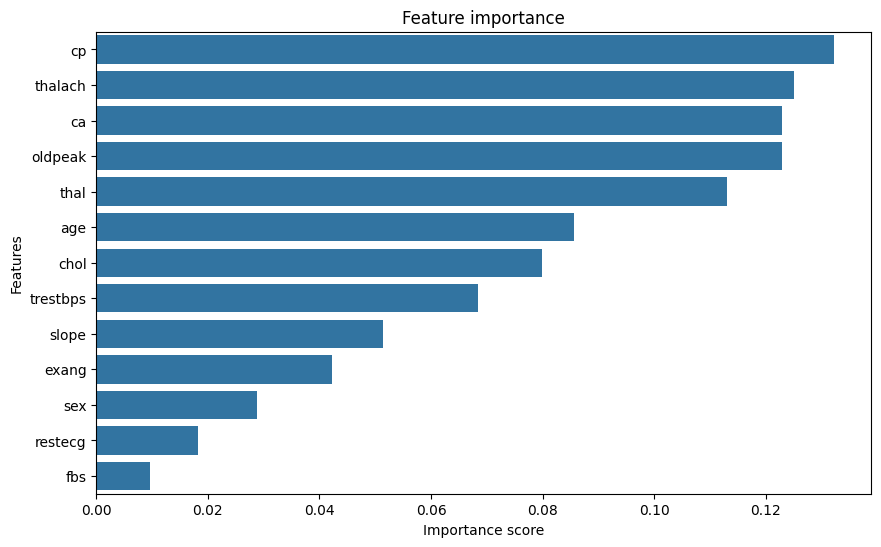

In [22]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature importance')
plt.xlabel('Importance score')
plt.ylabel('Features')
plt.show()

**Cross-Validation**

In [25]:
print("\nCross-Validation results\n ")

dt_scores = cross_val_score(dt_optimal, X, y, cv=5)
print(f"Decision Tree CV accuracy: {np.mean(dt_scores):.2f} (+/- {np.std(dt_scores):.2f})")

rf_scores = cross_val_score(rf, X, y, cv=5)
print(f"Random Forest CV accuracy: {np.mean(rf_scores):.2f} (+/- {np.std(rf_scores):.2f})")


Cross-Validation results
 
Decision Tree CV accuracy: 1.00 (+/- 0.00)
Random Forest CV accuracy: 1.00 (+/- 0.01)


**Compare models**

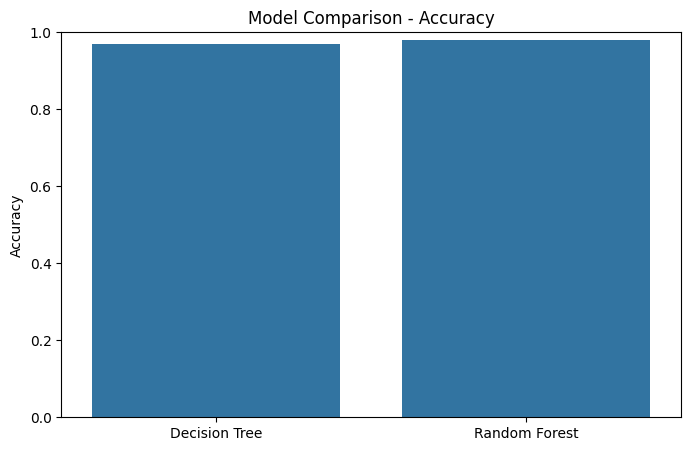

In [26]:
plt.figure(figsize=(8, 5))
models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_optimal), accuracy_score(y_test, y_pred_rf)]
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**Hyperparameter tuning**

In [27]:
print("\nRandom Forest Hyperparameter Tuning")
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid,
                          cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)


Random Forest Hyperparameter Tuning
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Evaluate tuned Random Forest**


Tuned Random Forest performance:
Accuracy: 0.9805194805194806

Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



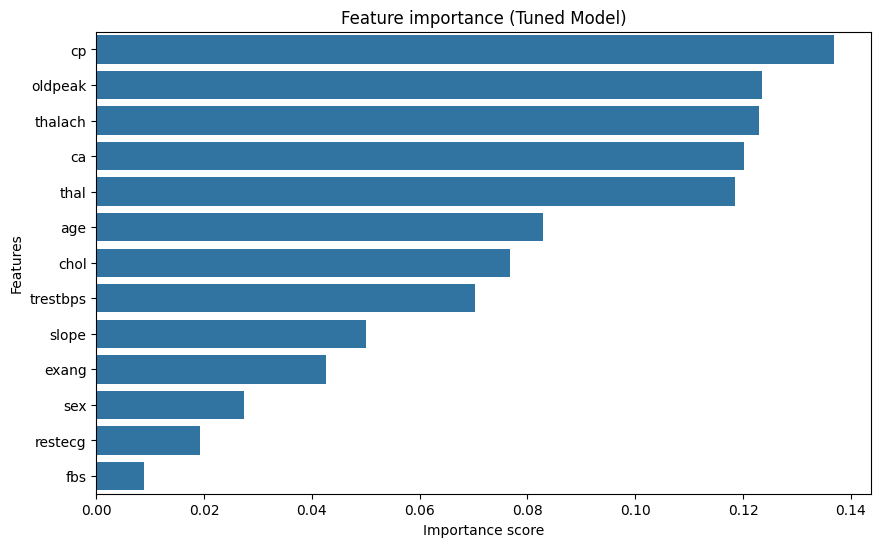

In [28]:
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\nTuned Random Forest performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification report:")
print(classification_report(y_test, y_pred_best_rf))

feature_importance_tuned = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importance_tuned = feature_importance_tuned.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_tuned, y=feature_importance_tuned.index)
plt.title('Feature importance (Tuned Model)')
plt.xlabel('Importance score')
plt.ylabel('Features')
plt.show()

**Final comparison table**

In [29]:
print("\nFinal Model Comparison ")
final_scores = {
    'Model': ['Decision Tree', 'Random Forest', 'Tuned Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_optimal),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_best_rf)
    ],
    'CV Accuracy': [
        np.mean(dt_scores),
        np.mean(rf_scores),
        cross_val_score(best_rf, X, y, cv=5).mean()
    ]
}

final_df = pd.DataFrame(final_scores)
print(final_df)


Final Model Comparison 
                 Model  Accuracy  CV Accuracy
0        Decision Tree  0.970779     1.000000
1        Random Forest  0.980519     0.997073
2  Tuned Random Forest  0.980519     0.994146
